# Subjectivity Analysis

Using `TextBlob` to analyse subjectivity of news from Dec 2019 - August 2020. Analysis includes seperate countries and blocks of countries. 

In [1]:
# Import Necessary Libraries

from textblob import TextBlob # For sentiment analysis
import numpy as np # For dataframe analysis
import pandas as pd # For dataframe analysis
import re # Regix to remove punctuation from strings I split
import matplotlib.pyplot as plt # For graphs
import seaborn as sns # For graphs
%matplotlib inline

In [2]:
# Declare Global Variables

yearMonths = ['201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008']
yearMonthsWord = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020']

In [3]:
# Get the dataframes and combine them into a single df

ae_df = pd.read_csv('Clean Data/AE_cleandf.csv')
cn_df = pd.read_csv('Clean Data/CN_cleandf.csv')
de_df = pd.read_csv('Clean Data/DE_cleandf.csv')
fr_df = pd.read_csv('Clean Data/FR_cleandf.csv')
ir_df = pd.read_csv('Clean Data/IR_cleandf.csv')
kw_df = pd.read_csv('Clean Data/KW_cleandf.csv')
qa_df = pd.read_csv('Clean Data/QA_cleandf.csv')
ru_df = pd.read_csv('Clean Data/RU_cleandf.csv')
sa_df = pd.read_csv('Clean Data/SA_cleandf.csv')
tr_df = pd.read_csv('Clean Data/TR_cleandf.csv')
uk_df = pd.read_csv('Clean Data/UK_cleandf.csv')
us_df = pd.read_csv('Clean Data/US_cleandf.csv')

In [4]:
df = pd.concat([ae_df, cn_df, de_df, fr_df, ir_df, kw_df, qa_df, ru_df, sa_df, tr_df, uk_df, us_df], ignore_index=True)
df

,name,path,country,network,date,token_freq,text
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,AE,EmiratesNewsAgency,20200619,4,MELBOURNE 18th June 2020 WAM The UAE General C...
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,AE,AlArabiya,20200422,13,020 Al Arabiya All rights Reserved Provided by...
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,AE,TheNational,20200328,10,UAE offers to help Syria counter coronavirus t...
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,AE,KhaleejTimes,20200616,3,LOréal Middle East has launched a UAE solidari...
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,AE,TheNational,20200318,16,Medical staff push a patient on a gurney to a ...
...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,US,AssociatedPress,20200402,5,World Food Program USA Allocates 333000 in Eme...
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,US,TheNewYorkTimes,20200629,13,The country has been hit with a triplewhammy r...
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,US,CNN,20200520,18,CNNChinese leader Xi Jinping made preserving d...
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,US,VOA,20200402,22,WASHINGTON North Koreas decision to protect it...


## Functions

Declaring functions at the top so that I can call them whenever needed.

In [5]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

def checkYearMonth(row):
    value = row['date']
    return str(value)[0:6]

def combinedTextForCountryDf(country):
    index = 0
    dfCountryYrList = []
    
    for ym in yearMonths:
        combinedText = ' '.join(df[(df['yearmonth'] == ym) & (df['country'] == country)].text)
        dictCountryYr = {'country': country, 'yearmonth': ym, 'text': combinedText}
        dfCountryYrList.append(dictCountryYr)
    return dfCountryYrList


In [6]:
# Clean the dataframe
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df['yearmonth'] = df.apply(checkYearMonth, axis=1)
df

,name,path,country,network,date,token_freq,text,yearmonth
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,AE,EmiratesNewsAgency,20200619,4,melbourne 18th june 2020 wam the uae general c...,202006
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,AE,AlArabiya,20200422,13,020 al arabiya all rights reserved provided by...,202004
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,AE,TheNational,20200328,10,uae offers to help syria counter coronavirus t...,202003
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,AE,KhaleejTimes,20200616,3,loréal middle east has launched a uae solidari...,202006
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,AE,TheNational,20200318,16,medical staff push a patient on a gurney to a ...,202003
...,...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,US,AssociatedPress,20200402,5,world food program usa allocates 333000 in eme...,202004
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,US,TheNewYorkTimes,20200629,13,the country has been hit with a triplewhammy r...,202006
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,US,CNN,20200520,18,cnnchinese leader xi jinping made preserving d...,202005
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,US,VOA,20200402,22,washington north koreas decision to protect it...,202004


In [7]:
# Create a function to get TextBlob Subjectivity Score
# TextBlob Subjectivity: https://textblob.readthedocs.io/en/dev/quickstart.html

def getSubjectivity(country):
    countryYrList = combinedTextForCountryDf(country)
    countryYrDf = pd.DataFrame(countryYrList)
    listCountry = countryYrDf['text'].to_list()
    subjectivityCountry = []
    for p in listCountry:
        subjectivityCountry.append(TextBlob(p).sentiment.subjectivity) # Create a list of subjectivity score for each month
    return subjectivityCountry

In [8]:
# Get Subjectivity for Gulf Donors

subjectivityAe = getSubjectivity('AE')
subjectivitySa = getSubjectivity('SA')
subjectivityQa = getSubjectivity('QA')
subjectivityKw = getSubjectivity('KW')

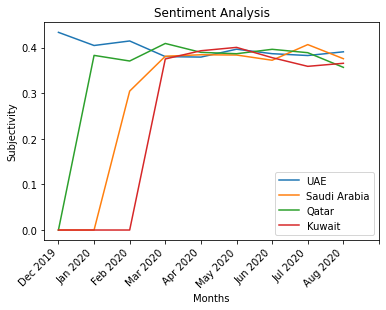

In [9]:
# Create a single plot with lines representing countries for this block

f, ax = plt.subplots()

ax.plot(subjectivityAe, label='UAE')
ax.plot(subjectivitySa, label='Saudi Arabia')
ax.plot(subjectivityQa, label='Qatar')
ax.plot(subjectivityKw, label='Kuwait')

# Change x ticks to years
xl = list(range(0, 10)) 
ax.set_xticks(xl)
ax.set_xticklabels(yearMonthsWord)

# Add labels
plt.title('Sentiment Analysis')
plt.xlabel('Months')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [10]:
# Get Subjectivity for EuroAtlantic Countries

subjectivityUs = getSubjectivity('US')
subjectivityUk = getSubjectivity('UK')
subjectivityDe = getSubjectivity('DE')
subjectivityFr = getSubjectivity('FR')

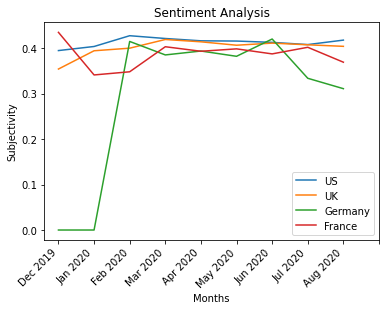

In [11]:
# Create a single plot with lines representing countries for this block

f, ax = plt.subplots()

ax.plot(subjectivityUs, label='US')
ax.plot(subjectivityUk, label='UK')
ax.plot(subjectivityDe, label='Germany')
ax.plot(subjectivityFr, label='France')

# Change x ticks to years
xl = list(range(0, 10)) 
ax.set_xticks(xl)
ax.set_xticklabels(yearMonthsWord)

# Add labels
plt.title('Sentiment Analysis')
plt.xlabel('Months')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [12]:
# Get Subjectivity for New Global Media Players

subjectivityCn = getSubjectivity('CN')
subjectivityTr = getSubjectivity('TR')
subjectivityIr = getSubjectivity('IR')
subjectivityRu = getSubjectivity('RU')

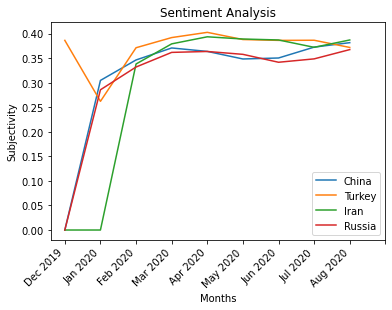

In [13]:
# Create a single plot with lines representing countries for this block

f, ax = plt.subplots()

ax.plot(subjectivityCn, label='China')
ax.plot(subjectivityTr, label='Turkey')
ax.plot(subjectivityIr, label='Iran')
ax.plot(subjectivityRu, label='Russia')

# Change x ticks to years
xl = list(range(0, 10)) 
ax.set_xticks(xl)
ax.set_xticklabels(yearMonthsWord)

# Add labels
plt.title('Sentiment Analysis')
plt.xlabel('Months')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

A few important things to note here:

* There are some months where values are zero. That's because we did not have articles for that country in that month.
* The subjectivity trend does not show significant differences but there are slight fluctuations in the trend lines.
* To get a better analysis, I'll combine the countries into blocks and try to evaluate subjectivity.

In [14]:
df # Take a look at the df

,name,path,country,network,date,token_freq,text,yearmonth
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,AE,EmiratesNewsAgency,20200619,4,melbourne 18th june 2020 wam the uae general c...,202006
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,AE,AlArabiya,20200422,13,020 al arabiya all rights reserved provided by...,202004
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,AE,TheNational,20200328,10,uae offers to help syria counter coronavirus t...,202003
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,AE,KhaleejTimes,20200616,3,loréal middle east has launched a uae solidari...,202006
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,AE,TheNational,20200318,16,medical staff push a patient on a gurney to a ...,202003
...,...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,US,AssociatedPress,20200402,5,world food program usa allocates 333000 in eme...,202004
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,US,TheNewYorkTimes,20200629,13,the country has been hit with a triplewhammy r...,202006
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,US,CNN,20200520,18,cnnchinese leader xi jinping made preserving d...,202005
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,US,VOA,20200402,22,washington north koreas decision to protect it...,202004


In [15]:
cdf = df # Keeping a copy of df

# Replace country names with country block names so that we can filter df later

df = df.replace({'country':'AE'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'KW'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'SA'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'QA'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'US'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'UK'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'DE'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'FR'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'CN'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'RU'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'IR'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'TR'},{'country':'New Global Media Players'},regex=False)

In [16]:
# Get subjectivity score for country blocks
subjectivityGCD = getSubjectivity('Gulf Countries')
subjectivityEAC = getSubjectivity('Euro-Atlantic Countries')
subjectivityNGM = getSubjectivity('New Global Media Players')

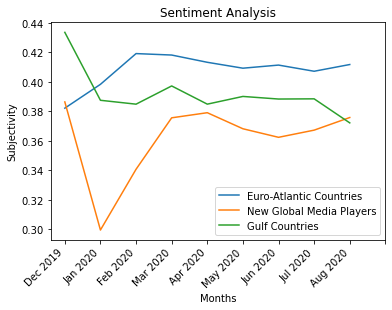

In [17]:
# Create a single plot with lines representing country blocks

f, ax = plt.subplots()

ax.plot(subjectivityEAC, label='Euro-Atlantic Countries')
ax.plot(subjectivityNGM, label='New Global Media Players')
ax.plot(subjectivityGCD, label='Gulf Countries')

# Change x ticks to years
xl = list(range(0, 10)) 
ax.set_xticks(xl)
ax.set_xticklabels(yearMonthsWord)

# Add labels
plt.title('Sentiment Analysis')
plt.xlabel('Months')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

One important trend to note here is the relative drop in subjectivity for New Global Media Players in January 2020 i.e. the start of coronavirus outbreak. One reason for the drop may be that the New Global Media Players were mostly taking in numbers mentioning the number of coronavirus cases increasing. Secondly, they were also involved in humanitarian aid, and news articles might have reported the number of donations or aid sent out or recieved.